# Predicting Mushroom Category

# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data

In [2]:
df=pd.read_csv("Downloads/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# Cleaning Data

In [5]:
df.isnull()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


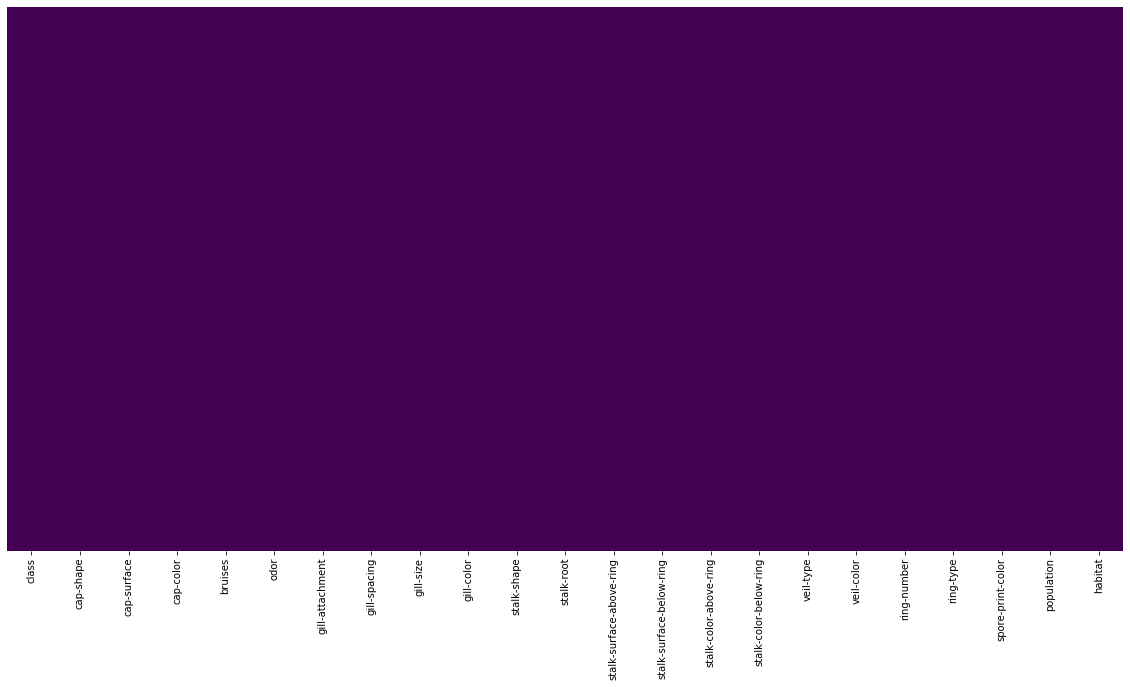

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Exploratory Data Analysis

Text(0.5, 0, 'cap-shape')

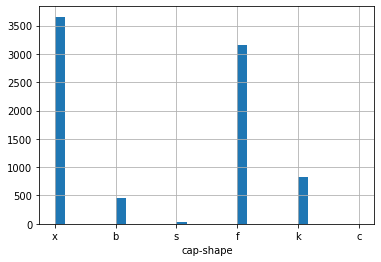

In [7]:
df['cap-shape'].hist(bins=30)
plt.xlabel('cap-shape')

ValueError: could not convert string to float: 'p'

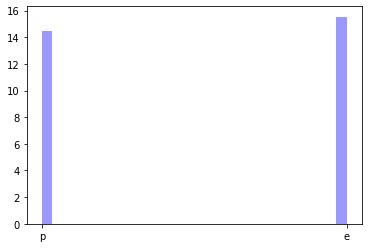

In [8]:
sns.distplot(df['class'],kde=True,color='blue',bins=30)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [19]:
LabEn=LabelEncoder();
for col in df.columns:
    df[col] = LabEn.fit_transform(df[col])

In [22]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


# Logistic Regression model

# Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('class',axis=1),df['class'], test_size=0.30, random_state=101)

# Training and Predicting

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\YOGESWARI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
predictions = logmodel.predict(X_test)

# Evaluation

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1274
           1       0.95      0.94      0.94      1164

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



# K Nearest Neighbors

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
scaler.fit(df.drop('class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
scaled_features = scaler.transform(df.drop('class',axis=1))

In [37]:
df1_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df1_feat.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730


In [38]:
scaled_features

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['class'],test_size=0.30)

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Predictions and Evaluations

In [43]:
pred = knn.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
print(confusion_matrix(y_test,pred))

[[1243    0]
 [   0 1195]]


In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1243
           1       1.00      1.00      1.00      1195

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [51]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

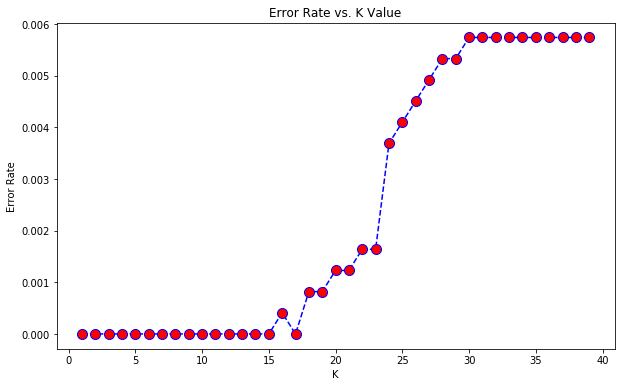

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [64]:
# NOW WITH K=28
knn = KNeighborsClassifier(n_neighbors=28)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=18')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=18


[[1242    1]
 [  12 1183]]


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1243
           1       1.00      0.99      0.99      1195

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



# Principal Component Analysis

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [67]:
scaled_data = scaler.transform(df)

In [68]:
from sklearn.decomposition import PCA

In [69]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [70]:
df_pca= pca.transform(scaled_data)

In [71]:
scaled_data.shape

(8124, 23)

In [72]:
df_pca.shape

(8124, 2)

Text(0, 0.5, 'Second Principal Component')

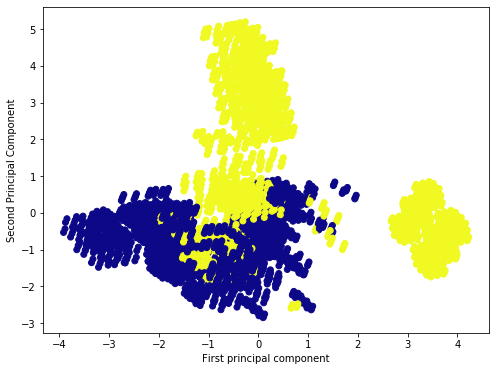

In [78]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0],df_pca[:,1],c=df['class'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

# Interpreting the components

In [73]:
pca.components_

array([[ 0.31782262,  0.01584465,  0.10359102, -0.15033872, -0.32691232,
         0.18643924,  0.0643359 , -0.01239453,  0.36933361, -0.38019049,
         0.16016564, -0.2572739 , -0.14586052, -0.16218434,  0.06180136,
         0.05768158, -0.        ,  0.06174134, -0.01522522, -0.40231422,
         0.33643852,  0.02410182,  0.11085109],
       [ 0.30934743,  0.05270203, -0.06102779,  0.17974707, -0.22824259,
        -0.32967482, -0.00127267, -0.13916754, -0.12597709, -0.08359584,
        -0.2688155 , -0.00839311, -0.30798388, -0.27827516, -0.36469832,
        -0.36235549, -0.        ,  0.00528597, -0.17322815, -0.04730123,
        -0.30138417,  0.17127693,  0.03337835]])

In [76]:
df_comp = pd.DataFrame(pca.components_)

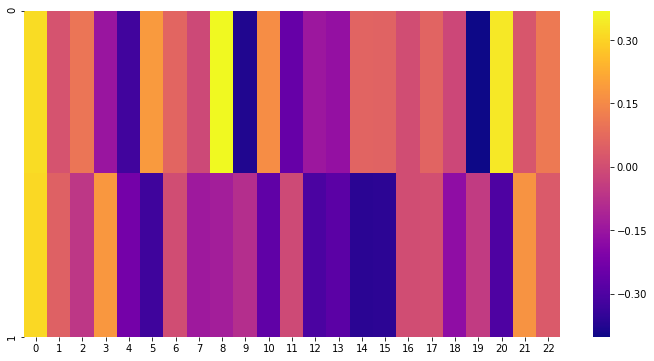

In [77]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

# Support Vector Machines

In [79]:
from sklearn.svm import SVC

In [80]:
svc_model = SVC()

In [81]:
svc_model.fit(X_train,y_train)

C:\Users\YOGESWARI\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Model Evaluation

In [82]:
predictions = svc_model.predict(X_test)

In [83]:
print(confusion_matrix(y_test,predictions))

[[1243    0]
 [   0 1195]]


In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1243
           1       1.00      1.00      1.00      1195

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Gridsearch

In [85]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [86]:
grid.fit(X_train,y_train)

C:\Users\YOGESWARI\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.980, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.944, total=   0.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.977, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.995, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.996, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.996, total=   0.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.953, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.950, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.946, total=   0.3s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   33.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [92]:
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [88]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [93]:
grid_predictions = grid.predict(X_test)

In [94]:
print(confusion_matrix(y_test,grid_predictions))

[[1243    0]
 [   0 1195]]


In [95]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1243
           1       1.00      1.00      1.00      1195

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# pickling

In [96]:
import pickle

In [104]:
with open('Error_rate', 'wb') as fh:
   pickle.dump(error_rate, fh)
pickle_out.close()

In [105]:
pickle_off = open ("Error_rate", "rb")
e= pickle.load(pickle_off)
print(e)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00041017227235438887, 0.0, 0.0008203445447087777, 0.0008203445447087777, 0.0012305168170631665, 0.0012305168170631665, 0.0016406890894175555, 0.0016406890894175555, 0.0036915504511894994, 0.004101722723543888, 0.004511894995898278, 0.004922067268252666, 0.005332239540607055, 0.005332239540607055, 0.005742411812961444, 0.005742411812961444, 0.005742411812961444, 0.005742411812961444, 0.005742411812961444, 0.005742411812961444, 0.005742411812961444, 0.005742411812961444, 0.005742411812961444, 0.005742411812961444]


In [106]:
error_rate

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00041017227235438887,
 0.0,
 0.0008203445447087777,
 0.0008203445447087777,
 0.0012305168170631665,
 0.0012305168170631665,
 0.0016406890894175555,
 0.0016406890894175555,
 0.0036915504511894994,
 0.004101722723543888,
 0.004511894995898278,
 0.004922067268252666,
 0.005332239540607055,
 0.005332239540607055,
 0.005742411812961444,
 0.005742411812961444,
 0.005742411812961444,
 0.005742411812961444,
 0.005742411812961444,
 0.005742411812961444,
 0.005742411812961444,
 0.005742411812961444,
 0.005742411812961444,
 0.005742411812961444]